
# 70's A-Z


Last year's XPN A to Z, was so much fun, they are doing again.
This time the [XPN 70's A to Z](http://xpn.org/music-artist/xpn-a-z) playlist is
limited to the 70's but otherwise similar to last year in that it is a
multi-week alphabetical walk though their catalog.
Not only was the music and the [Twitter feed](https://twitter.com/search?q=%23XPNAtoZ) fun,
but so was my side project, [AtoZ](AtoZ.ipynb) notebook,
doing statistical analysis of the playlist.

So, of course, I'm going to try it again.

In [1]:
%matplotlib inline
from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide();
    } else {
        $('div.input').show();
    }
        code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Status

- Hoped to add more analysis over the weekend.  Other things took priority.  Hopefully I'll catch up while the countdown is still happening.
- A few people have asked for comparisions with last years AtoZ and other list.
   - Added a simple comparision with last year's countdown
   - Comparision with 885 best and 88 worst still needs to happen


## Loading the data

For the moment, I'll just load the song lists from the
[XPN 70's A to Z](http://www.xpn.org/music-artist/xpn-a-z) page.
The by-letter lists are similar to what I did
in the original [AtoZ](AtoZ.ipynb) notebook.
This time there is a breakdown by year there as well, which I'll load.
Not all the tracks have years, so eventually we may redo the 
integration with [MusicBrainz](https://musicbrainz.org/)
and see how that compares.
Since I ended up populating the cache from the command line exclusively
last time, I'll omit the web scraping code and just load
[seventies.csv](cache/xpn/seventies.csv).
If you really want to see the web scraping, look at [load_xpn70s.py](load_xpn70s.py).

In [20]:
import pandas as pd
from os import path
cache_dir = './cache'
xpn_cache_dir = path.join(cache_dir, 'xpn')
playlist_cache = path.join(xpn_cache_dir, 'seventies.csv')
playlist = pd.read_csv(playlist_cache)

### Data Cleaning

Right now there's not much data cleaning 
outside of forcing years to be integer and filling in the 
missing values with 0's.
Well and dropping duplicates of course.

In [21]:
playlist['Year'] = playlist['Year'].fillna(0.0).astype(int)
playlist = playlist.drop_duplicates()
pass

## Examining the Data

Just to see what we're playing with,
lets look at the first few rows
and get some basic stats on the dataset.

In [22]:
HTML(playlist.head(5).to_html())

,Title,Artist,Letter,Year
0,A Calling-On Song,Steeleye Span,A,1970
1,A Case Of You,Joni Mitchell,A,1971
2,A Clue,Boz Scaggs,A,1977
3,A Dream Goes On Forever,Todd Rundgren,A,1974
4,A Gift,Lou Reed,A,1975


In [24]:
HTML(playlist.describe(include='all', percentiles=[]).to_html(na_rep=''))

,Title,Artist,Letter,Year
count,1782,1782,1782,1782.000000
unique,1720,668,10,
top,Cocaine,The Rolling Stones,I,
freq,3,26,307,
mean,,,,1644.374860
std,,,,737.083546
min,,,,0.000000
50%,,,,1974.000000
max,,,,1979.000000


In [25]:
print " %d rows of %d with year data" % (len(playlist[playlist['Year'] > 0]), len(playlist))

 1484 rows of 1782 with year data


So we know that, so far, we have seen 1782 tracks, with 1720 unique titles,
from 668 artists and that of those, we have years for 1484 of them.

## Data Analysis

### Songs by Letter

This was the first thing I looked at last time,
and it serves as a good "how are we doing" metric during the count down.
I promise, it will look better once there are a few more letters.

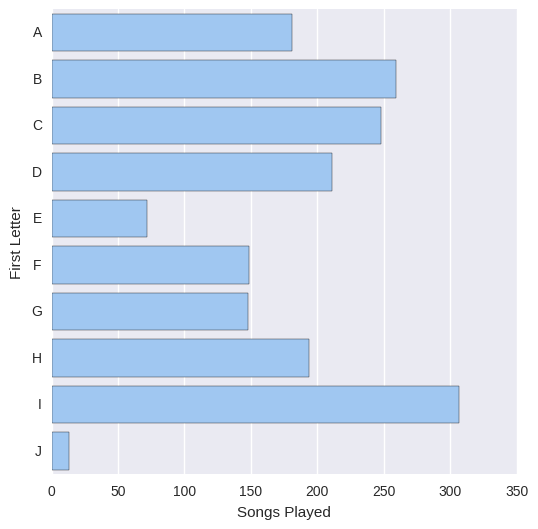

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes('pastel')
sns.countplot(y='Letter', data=playlist, color='b')
ax.set(xlabel="Songs Played", ylabel="First Letter")

### Songs by Year

Given the decade orientation this time,
it makes sense to break the songs down by year.

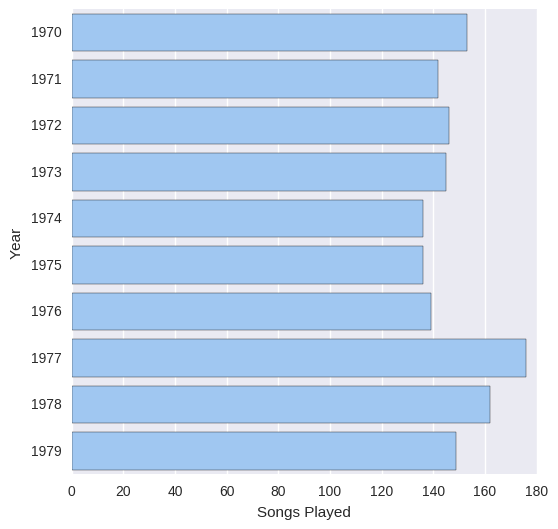

In [27]:
f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes('pastel')
sns.countplot(y='Year', data=playlist[playlist['Year'] > 0], color='b')
ax.set(xlabel="Songs Played", ylabel="Year")

### Most Popular Artists

Last year's playlist was dominated by the Beatles.
This time, the date cutoffs works against them,
and early on it looks like David Bowie and Neil Young.

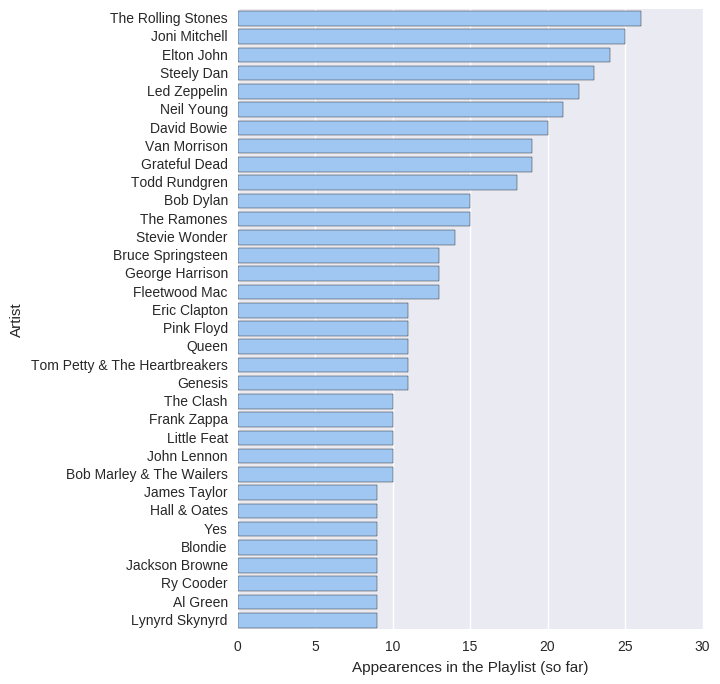

In [28]:
c = playlist['Artist'].value_counts()
artists = pd.DataFrame(zip(c.keys().tolist(), c.tolist()),
                       columns=('Artist', 'count'))
f, ax = plt.subplots(figsize=(6, 8))
sns.set_color_codes('pastel')
sns.barplot(y='Artist', x='count', data=artists[artists['count'] > 8], color='b')
ax.set(xlabel="Appearences in the Playlist (so far)")

### First words

Part of what started this last year was looking at first words.
I didn't think that would be interesting,
but still.

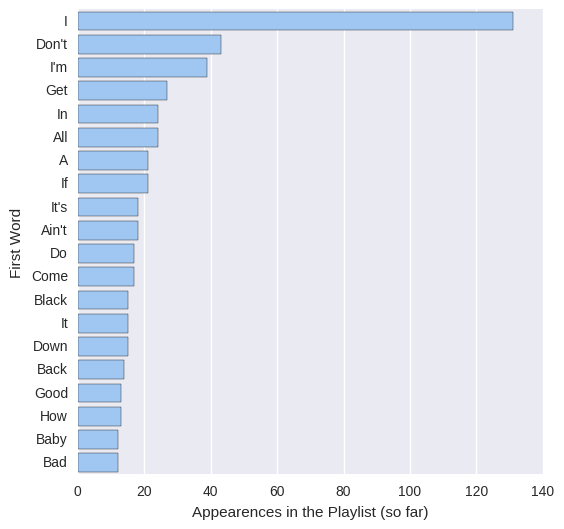

In [29]:
from nltk.tokenize import RegexpTokenizer
custom_tokenize = RegexpTokenizer("[\w'\-]+|[^\w'\s\-]").tokenize
playlist = playlist.join(playlist.apply(lambda x: custom_tokenize(x[0])[0], axis=1).to_frame('First Word'))

c = playlist['First Word'].value_counts()
words = pd.DataFrame(zip(c.keys().tolist(), c.tolist()),
                       columns=('First Word', 'count'))

f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes('pastel')
sns.barplot(y='First Word', x='count', data=words.head(20), color='b')
ax.set(xlabel="Appearences in the Playlist (so far)")

### Duplicate Titles

Duplicate titles are not necessarily covers,
though odds are that is the case.
There have been very few duplicates, in general.
We didn't get the first of 2 titles with three instances
until the early Cs with "Changes," and there haven't been any since.

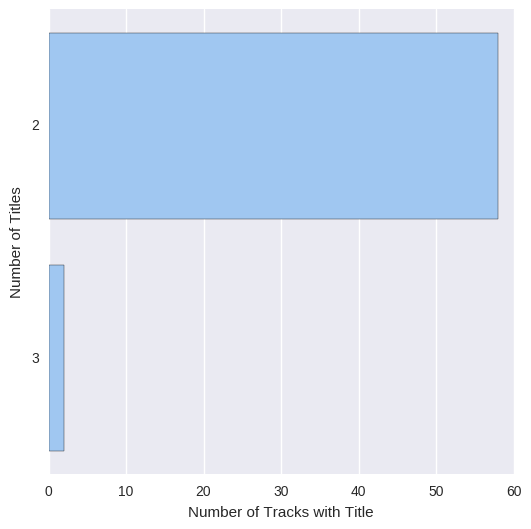

In [31]:
c = playlist['Title'].value_counts()
title_counts = pd.DataFrame(zip(c.keys().tolist(), c.tolist()),
                           columns=('Title', 'Count'))

f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes('pastel')
sns.countplot(y='Count', data=title_counts[title_counts['Count'] > 1], color='b')
ax.set(xlabel="Number of Tracks with Title", ylabel="Number of Titles")

In [32]:
HTML(title_counts[title_counts['Count'] > 2].sort_values(by='Title').to_html(index=False))

Title,Count
Changes,3
Cocaine,3


## Comparision with Previous Playlists
### Load old play lists

Consolidating [last year's playlist]('./cache/xpn/originals.csv')
we can load that and compare with this years

In [33]:

originals_cache = path.join(xpn_cache_dir, 'originals.csv')
originals = pd.read_csv(originals_cache)
originals = originals.drop_duplicates()

best885_cache = path.join(xpn_cache_dir, '885best.csv')
best885 = pd.read_csv(best885_cache)

worst88_cache = path.join(xpn_cache_dir, '88worst.csv')
worst88 = pd.read_csv(worst88_cache)

reruns = pd.merge(playlist, originals, how='inner', on=['Title', 'Artist'])
reruns.to_csv(path.join(xpn_cache_dir, 'reruns.csv'), index=False)

besties = pd.merge(playlist, best885, how='inner', on=['Title', 'Artist'])
besties.to_csv(path.join(xpn_cache_dir, 'best_ones.csv'), index=False)
horrors = pd.merge(playlist, worst88, how='inner', on=['Title', 'Artist'])
horrors.to_csv(path.join(xpn_cache_dir, 'horrors.csv'), index=False)

s= "<p>Only %d of %d tracks or %0.2f%% from the 70s's playlist " + \
    "were in last year's original playlist. " + \
    "Those are availiable as <a href='cache/xpn/reruns.csv'>reruns.csv</a>. " + \
    "And just %d or %0.2f where in 2014's 885 best playlist. " + \
    "Those are availiable as <a href='cache/xpn/best_ones.csv'>best_ones.csv</a>. " + \
    "Sadly %d were in 2014's 88 worst playlist.</p>" + \
    "Those are:"
HTML(s %(len(reruns), len(playlist), float(len(reruns) * 100) / float(len(playlist)),
         len(besties), float(len(besties) * 100) / float(len(playlist)),
         len(horrors)))


In [34]:
HTML(horrors.to_html(index=False, columns=['Title', 'Artist']))

Title,Artist
Afternoon Delight,Starland Vocal Band
Bohemian Rhapsody,Queen
Disco Duck,Rick Dees
Feelings,Morris Albert
Free Bird,Lynyrd Skynyrd
Horse With No Name,America
Hotel California,The Eagles


## Availability

The code for this project is in [my git hub repo](https://github.com/asudell/a2z).
The notebook its self is [published on nbviewer](http://nbviewer.jupyter.org/github/asudell/a2z/blob/master/70sAtoZ.ipynb)

## License

This project is licensed under a
[Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).
You are free to use for commercial or non-commercial purposes,
so long as you attribute the source and also allow sharing.